## K Means Clustring Algorithms Implimentation

In [2]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=24)

In [4]:
X.shape

(1000, 2)

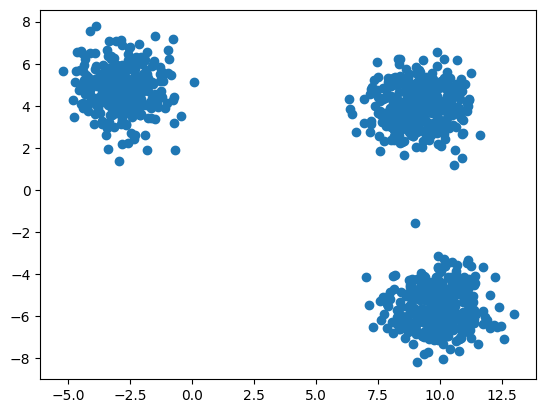

In [5]:
plt.scatter(X[:,0], X[:,1])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
## Manuals process 
## Elbow Method to select the k values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[39344.29667040035,
 11308.087461725434,
 1318.1484805161379,
 1181.5679130544345,
 1045.1109666758691,
 924.1419743532226,
 778.5842323911502,
 694.952758029051,
 580.8360857894811,
 541.9085388500823]

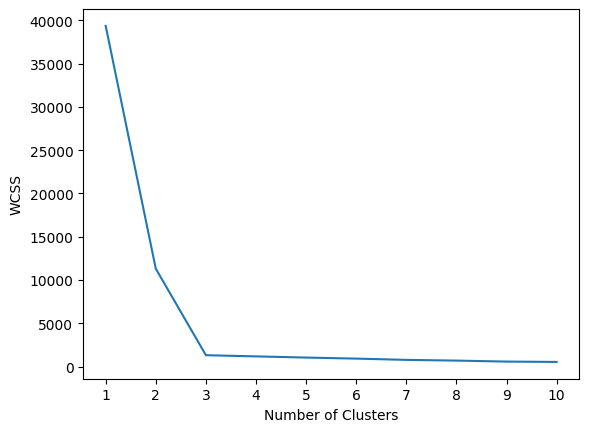

In [10]:
## plot elbow curve 
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [12]:
y_labels = kmeans.fit_predict(X_train)

In [13]:
y_labels

array([0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0,

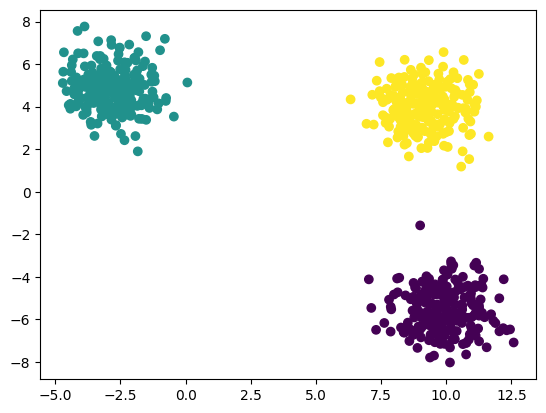

In [14]:
plt.scatter(X_train[:,0], X_train[:,1],c=y_labels)

In [16]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [17]:
## performance metrices 
## Silhoutee score 
from sklearn.metrics import silhouette_score 


In [23]:
silhouette_coefficient= []
for k in range(2,11): 
    kmenas = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficient.append(score)

In [24]:
silhouette_coefficient

[np.float64(0.8275577700030664),
 np.float64(0.8275577700030664),
 np.float64(0.8275577700030664),
 np.float64(0.8275577700030664),
 np.float64(0.8275577700030664),
 np.float64(0.8275577700030664),
 np.float64(0.8275577700030664),
 np.float64(0.8275577700030664),
 np.float64(0.8275577700030664)]

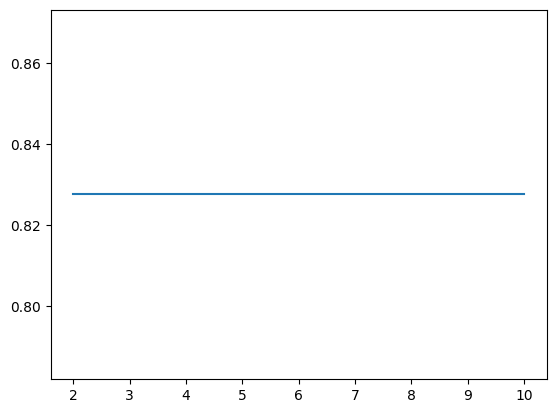

In [20]:
## plotting silhoutee score 
plt.plot(range(2,11),silhouette_coefficient)
